### $\color{red}{\text{Question 1:}}$

After performing experiments in the lab to measure a performance output (y) of a process as a function of temperature (T), the data shown below are collected. The T-y relationship is expected to be linear $ (y=aT+b) $, but the measurements are corrupted by noise and measurement errors.

(a)	Formulate and solve (in Pyomo) the NLP optimization problem to find optimal a and b, using the sum of squared errors as an objective function.

(b)	Formulate and solve (in Pyomo) an LP optimization problem to find the optimal a and b, using the sum of absolute errors as an objective function. Here you need to use a trick for representing absolute values using linear programming. You can use online resources to research this trick (i.e., “The AIMMS Modeling guide – Linear programming tricks” is highly recommended).


****************** problem 1a ****************** : 
Termination condition: optimal
estimated parameters : 
a : 0.015022727272726952
b : -1.2268181818181496
Objective function value @ estimated parameters : 
obj : 0.11997249999999997


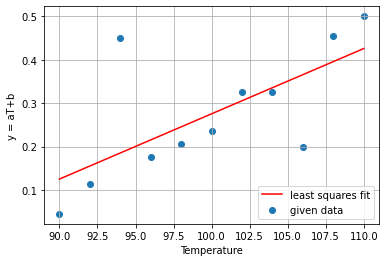

In [1]:
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverStatus, TerminationCondition
import matplotlib.pyplot as plt

#Data is created below. Temperatures range from 90 to 110 and corresponding output y values are provided in y:
T = np.linspace(90,110,11)
y = [0.045, 0.115, 0.45, 0.175, 0.205, 0.235, 0.325, 0.325, 0.2, 0.455, 0.5]


#write your code for question 1 here

import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverStatus, TerminationCondition
import matplotlib.pyplot as plt

#Data is created below. Temperatures range from 90 to 110 and corresponding output y values are provided in y:
T = np.linspace(90,110,11)
y = [0.045, 0.115, 0.45, 0.175, 0.205, 0.235, 0.325, 0.325, 0.2, 0.455, 0.5]



## -------------------------------------------------problem 1a ----------------------------------------------------
# Formulation here with comments on variables, constraints:
m = ConcreteModel()

#variables
m.a = Var(within=Reals)
m.b = Var(within=Reals)

#Constraints
# -- none---


#objective function
def sse(m):
    return sum((m.a*T[i] + m.b - y[i])**2 for i in RangeSet(0,10))
m.obj = Objective(rule=sse, sense=minimize)

#----- alternate syntax
# #objective function
# def sse(m):
#     return sum((m.a*Ti + m.b - yi)**2 for Ti, yi in zip(T, y))
# m.obj = Objective(rule=sse, sense=minimize)

# solve
solver = SolverFactory('ipopt')
results = solver.solve(m)

# print results
print('****************** problem 1a ****************** : ')
print(f"Termination condition: {results.solver.termination_condition}")
print('estimated parameters : ')
print(str(m.a)+' : '+ str(value(m.a)))
print(str(m.b)+' : '+ str(value(m.b)))
print('Objective function value @ estimated parameters : ')
print(str(m.obj)+' : '+ str(value(m.obj)))

fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(T,y, label = "given data")
plt.plot(T, [value(m.a)*Ti + value(m.b) for Ti in T],'r', label = "least squares fit")
plt.xlabel('Temperature')
plt.ylabel('y = aT+b')
plt.legend(loc="lower right")
plt.grid(True)

****************** problem 1b ****************** : 
Termination condition: optimal
method 1 : introduce 22 variables and 11 constraints

estimated parameters : 
a : 0.02275
b : -2.0025
Objective function value @ estimated parameters : 
obj : 0.6595000000000008


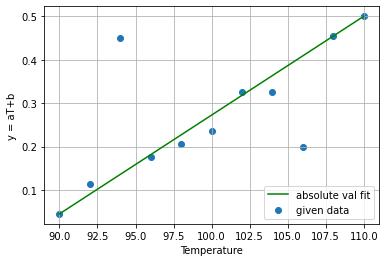

In [2]:
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverStatus, TerminationCondition
import matplotlib.pyplot as plt

#Data is created below. Temperatures range from 90 to 110 and corresponding output y values are provided in y:
T = np.linspace(90,110,11)
y = [0.045, 0.115, 0.45, 0.175, 0.205, 0.235, 0.325, 0.325, 0.2, 0.455, 0.5]

## -------------------------------------------------problem 1b ----------------------------------------------------
## ------------------------ method 1 : introduce 22 variables and 11 constraints
p1 = ConcreteModel()

#variables
p1.a = Var(within=Reals)
p1.b = Var(within=Reals)
p1.eplus = Var(RangeSet(0,10),within=NonNegativeReals)
p1.eminus = Var(RangeSet(0,10),within=NonNegativeReals)

#Constraints
def cons(p1,i):
    return p1.eplus[i] - p1.eminus[i] == p1.a*T[i]+p1.b - y[i]

#objective function
def ae(p1):
    return sum(p1.eplus[i] + p1.eminus[i] for i in RangeSet(0,10))

p1.cons = Constraint(RangeSet(0,10), rule = cons)
p1.obj = Objective(rule=ae, sense=minimize)

# solve
solver = SolverFactory('glpk')
results = solver.solve(p1)
# print results
print('****************** problem 1b ****************** : ')
print(f"Termination condition: {results.solver.termination_condition}")
print('method 1 : introduce 22 variables and 11 constraints'),print()
print('estimated parameters : ')
print(str(p1.a)+' : '+ str(value(p1.a)))
print(str(p1.b)+' : '+ str(value(p1.b)))
print('Objective function value @ estimated parameters : ')
print(str(p1.obj)+' : '+ str(value(p1.obj)))

fig, ax = plt.subplots(figsize=(6,4)) 
plt.scatter(T,y, label = "given data")
plt.plot(T, [value(p1.a)*Ti + value(p1.b) for Ti in T],'g', label = "absolute val fit")
plt.xlabel('Temperature')
plt.ylabel('y = aT+b')
plt.legend(loc="lower right")
plt.grid(True)    

****************** problem 1b ****************** : 
Termination condition: optimal
method 1 : introduce 11 variables and 22 constraints

estimated parameters : 
a : 0.02275
b : -2.0025
Objective function value @ estimated parameters : 
obj : 0.6595000000000006


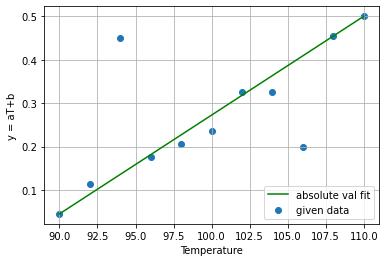

In [3]:
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverStatus, TerminationCondition
import matplotlib.pyplot as plt

#Data is created below. Temperatures range from 90 to 110 and corresponding output y values are provided in y:
T = np.linspace(90,110,11)
y = [0.045, 0.115, 0.45, 0.175, 0.205, 0.235, 0.325, 0.325, 0.2, 0.455, 0.5]

## -------------------------------------------------problem 1b ----------------------------------------------------
## ------------------------ method 1 : introduce 11 variables and 22 constraints
p2 = ConcreteModel()

#variables
p2.a = Var(within=Reals)
p2.b = Var(within=Reals)
p2.e = Var(RangeSet(0,10),within=NonNegativeReals)

#Constraints
def cons1(p2,i):
    return  -p2.e[i] <= p2.a*T[i]+p2.b - y[i]
def cons2(p2,i):
    return p2.a*T[i]+p2.b - y[i] <= p2.e[i]

#objective function
def ae(p2):
    return sum(p2.e[i] for i in RangeSet(0,10))

p2.cons1 = Constraint(RangeSet(0,10), rule = cons1)
p2.cons2 = Constraint(RangeSet(0,10), rule = cons2)
p2.obj = Objective(rule=ae, sense=minimize)

# solve
solver = SolverFactory('glpk')
results = solver.solve(p2)
# print results
print('****************** problem 1b ****************** : ')
print(f"Termination condition: {results.solver.termination_condition}")
print('method 1 : introduce 11 variables and 22 constraints'),print()
print('estimated parameters : ')
print(str(p2.a)+' : '+ str(value(p2.a)))
print(str(p2.b)+' : '+ str(value(p2.b)))
print('Objective function value @ estimated parameters : ')
print(str(p2.obj)+' : '+ str(value(p2.obj)))

fig, ax = plt.subplots(figsize=(6,4)) 
plt.scatter(T,y, label = "given data")
plt.plot(T, [value(p2.a)*Ti + value(p2.b) for Ti in T],'g', label = "absolute val fit")
plt.xlabel('Temperature')
plt.ylabel('y = aT+b')
plt.legend(loc="lower right")
plt.grid(True)    

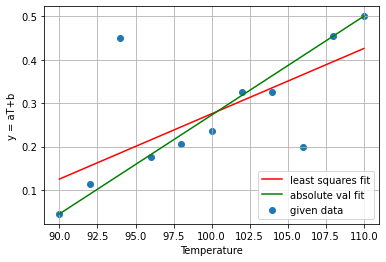

In [4]:
# compare both the fits (this is not asked in the question, and should not be expected to be answered)
# Which one among the two do you think is affected by outliers the most?

fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(T,y, label = "given data")
plt.plot(T, [value(m.a)*Ti + value(m.b) for Ti in T],'r', label = "least squares fit")
plt.plot(T, [value(p1.a)*Ti + value(p1.b) for Ti in T],'g', label = "absolute val fit")
plt.xlabel('Temperature')
plt.ylabel('y = aT+b')
plt.legend(loc="lower right")
plt.grid(True)

### $\color{red}{\text{Question 2:}}$

Characterize the following problem with respect to convexity:
$$
f(x_{1},x_{2}) = x_{1}^{2} - 4x_{1}x_{2} + 4x_{2}^{2}-ln(x_{1}x_{2}), x_{1},x_{2}>0
$$
Type your steps here using Jupyter markdown and do not answer by plotting the function:

#### Write your answer here:

### $\color{blue}{\text{Using the properties of convex functions:}}$

Let us re-write the function as$$
f\left(x_{1}, x_{2}\right)=-\ln \left(x_{1} x_{2}\right)+\left(x_{1}-2 x_{2}\right)^{2}
$$
$-\ln \left(x_{1} x_{2}\right)$ is convex in terms of $x_{1}$ and $x_{2}$, as
$$
H\left(-\ln \left(x_{1} x_{2}\right)\right)=\left[\begin{array}{cc}
\frac{1}{x_{1}^{2}} & 0 \\
0 & \frac{1}{x_{2}^{2}}
\end{array}\right], 
$$
Observe that the eigen values of above hessian are positive since $x_{1}, x_{2}$ are positive

$\left(x_{1}-2 x_{2}\right)^{2}$ is also convex:
$$
H\left(\left(x_{1}-2 x_{2}\right)^{2}\right )=\left[\begin{array}{cc}
2 & -4 \\
-4 & 8
\end{array}\right], \lambda_{1}=0, \lambda_{2}=10
$$
thus the matrix is positive semi-definite.

By using the properties of convexity, because both the functions are convex, the overall sum is also **convex**



### $\color{blue}{\text{An alternate way to check is to calculate the hessian of the overall function:}}$

$$
H\left(-\ln \left(x_{1} x_{2}\right) + \left(x_{1}-2 x_{2}\right)^{2}\right )=\left[\begin{array}{cc}
2+\frac{1}{x_{1}^{2}} & -4 \\
-4 & 8+\frac{1}{x_{2}^{2}}
\end{array}\right],
$$

The characteristic equation for eigen values is:

$$
\lambda^{2}-\lambda\left(8+\frac{1}{x_{1}^{2}}+\frac{1}{x_{2}^{2}}\right)+\left(\frac{8}{x_{1}^{2}}+\frac{2}{x_{2}^{2}}+\frac{1}{\left(x_{1} x_{2}\right)^{2}}\right)=0
$$

- The quadratic is of the form:
$$
x^{2}-b x+c=0
$$
- The roots of the above quadratic can be written as:
$$
\frac{b \pm \sqrt{b^{2}-4 c}}{2} .
$$
- For the root or roots to be real, we require that $b^{2}-4 c \geq 0$, that is, $b^{2} \geq 4 c$.
- In order for them to be positive, we require that
$$
b-\sqrt{b^{2}-4 c}>0 .
$$
- This implies $b>0$, let us rearrange this to get
$$
b>\sqrt{b^{2}-4 c},
$$
- which (assuming that $b>0$ ) is true if and only if
$$
b^{2}>b^{2}-4 c
$$
- since both sides of the inequality are **positive** so we may square. And this results in 
$$
4 c>0
$$
- So, for the roots to be real and positive then $b>0$ and $b^{2} \geq 4 c>0$.

clearly **b** and **c** are > 0 since since $x_{1}, x_{2}$ are positive

Lets check $b^{2}-4 c$
$$
b^{2}-4 c=\left(8+\frac{1}{x_{1}^{2}}+\frac{1}{x_{2}^{2}}\right)^{2}-4\left(\frac{8}{x_{1}^{2}}+\frac{2}{x_{2}^{2}}+\frac{1}{\left(x_{1} x_{2}\right)^{2}}\right)
$$
$$
=\frac{\left(x_{1}^{2}-x_{2}^{2}-8 x_{1}^{2} x_{2}^{2}\right)^{2}}{\left(x_{1} x_{2}\right)^{4}} \geq 0
$$

Therefore the eigen values are non negative and the hessian is positive definite. This implies that the function is convex.

### $\color{red}{\text{Question 3:}}$

A chemical company manufactures three types of chemicals: Chemical A, Chemical B and Chemical C. During a planning period, the company has a total of: 100hr engineering service, 700hr direct labor and 4000 lb of costly raw material available for the production. The three chemicals require different hours of engineering service, labor and amount of costly raw material per batch of final product sold:
- Fuel A: 1hr engineering service, 10hr direct labor, 30lb of raw material.
- Fuel B: 2hr engineering service, 4hr direct labor, 20lb of raw material.
- Fuel C: 1hr engineering service, 5hr direct labor, 10lb of raw material.

The company also offers different discounts when bulk purchases are made. The profit data is shown in
the following table:

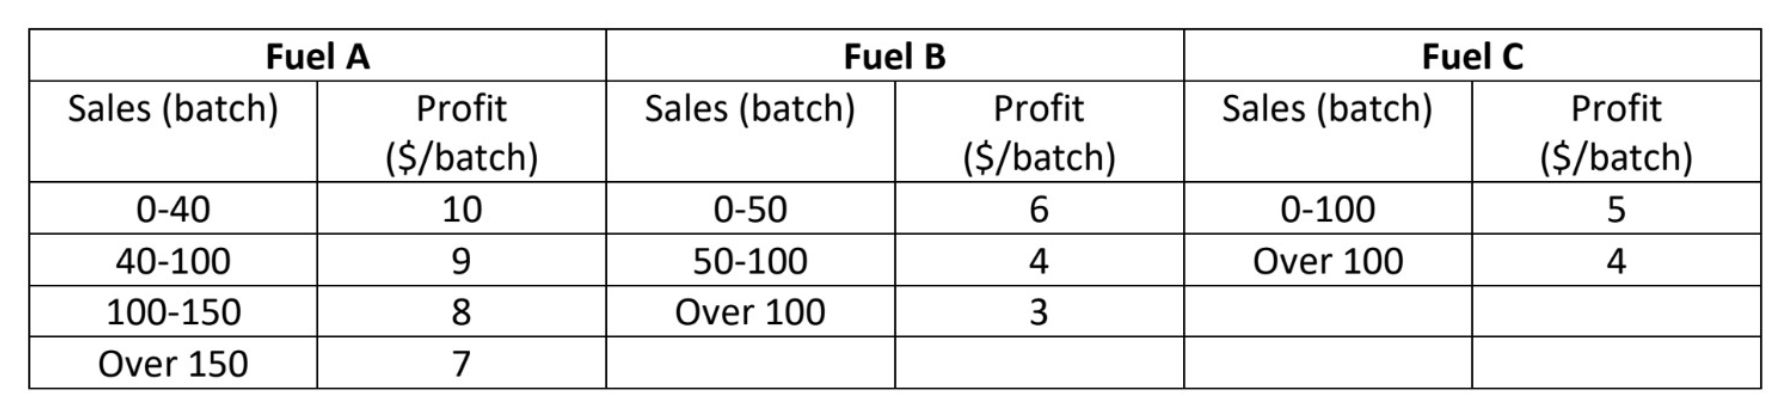

For example, if 120 batches of A are sold, the first 40 will earn ${$10/batch}$, the next 60 will earn ${$9/batch}$, and the remaining will earn ${$8/batch}$.
> Formulate an optimization problem to determine the most profitable product mix. Show clearly: 
>> (a) What variables you introduce and what they represent,\
(b) what is your objective function,\
(c) what are your constraints. Show your formulation in writing (or typed).



## 2.A1. LP formulation 
Objective is to optimize the profit of all three produce (A, B, and C). The key observation of this problem is that the functions of profit of A, B, and C are piecewise linear and concave. It is critical to capture the piecewise linearity.

### Variables
- $P_\mathrm{A}, P_\mathrm{B}, P_\mathrm{C}$: profits of fuel A, B, and C
- $x_\mathrm{A}, x_\mathrm{B}, x_\mathrm{C}$: amount of fuel A, B, and C

All variables should be nonnegative.
                  
### Objective function
$$ \max P_\mathrm{A} + P_\mathrm{B} + P_\mathrm{C} $$

### Constraints 
#### Profit of A

$P_\mathrm{A}$ is a piecewise linear function of $x_\mathrm{A}$:
\begin{equation*}
  P_\mathrm{A} (x_\mathrm{A}) =
    \begin{cases}
        10 x_\mathrm{A}, & x_\mathrm{A} \leq 40 \\
        400 + 9( x_\mathrm{A} - 40) = 9 x_\mathrm{A} + 40, & 40 \leq x_\mathrm{A} \leq 100 \\
        8 x_\mathrm{A} + 140, & 100 \leq x_\mathrm{A} \leq 150 \\
        7 x_\mathrm{A} + 290, & x_\mathrm{A} \geq 150
    \end{cases}
\end{equation*}

Its profile is shown below as the red segments:
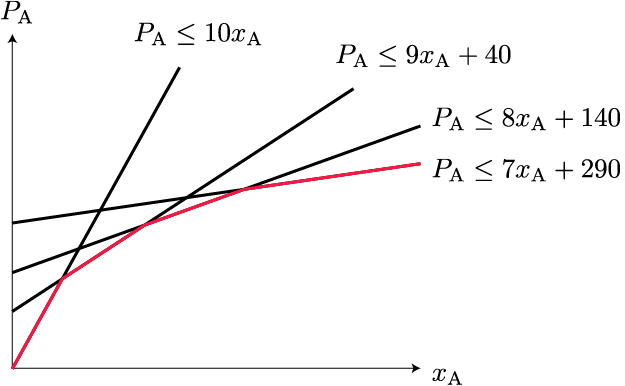

A set of inequality constraints corresponding to all pieces of $P_\mathrm{A}$ are also shown in the figure as black lines. It is worth noting that $P_\mathrm{A}$ always coincides with the line with the smallest value at any $x_\mathrm{A}$.
Meanwhile, we want to maximize the $P_\mathrm{A}$ term in the objective function, so there is always a constraint active, i.e., there is always one constraint that the equality holds.
Therefore, the piecewise function can be represented using inequality constraint:

\begin{equation*}
    P_\mathrm{A}(x_\mathrm{A}) \leq \min_{i \in \{1, 2, 3, 4\}} \{f_1(x_\mathrm{A}), f_2(x_\mathrm{A}), 
    f_3(x_\mathrm{A}), f_4(x_\mathrm{A})\}
    \text{ where }
    \begin{cases}
        f_1(x_\mathrm{A}) = 10 x_\mathrm{A} \\
        f_2(x_\mathrm{A}) = 9 x_\mathrm{A} + 40 \\
        f_3(x_\mathrm{A}) = 8 x_\mathrm{A} + 140 \\
        f_4(x_\mathrm{A}) = 7 x_\mathrm{A} + 290.
    \end{cases}
\end{equation*}

The above single constraint is not linear yet, as it contains the min operator; however, it is idental to the following set of linear constraint:
\begin{equation*}
    \begin{cases}
        P_\mathrm{A} \leq 10 x_\mathrm{A} \\
        P_\mathrm{A} \leq 9 x_\mathrm{A} + 40 \\
        P_\mathrm{A} \leq 8 x_\mathrm{A} + 140 \\
        P_\mathrm{A} \leq 7 x_\mathrm{A} + 290
    \end{cases}
\end{equation*}
This is because we require $P_\mathrm{A}$ to be $\leq$ the minimum among all four functions, which indicates that $P_\mathrm{A}$ must be $\leq$ all four functions simultaneously.

It is worthing noting that this technique only works when the function is concave and the term is maximized, or when
the function is convex and the term is minimized.

#### Profit of B
\begin{equation*}
  P_\mathrm{B} =
    \begin{cases}
        6 x_\mathrm{B}, & x_\mathrm{B} \leq 50 \\
        4 x_\mathrm{B} + 100, & 50 \leq x_\mathrm{B} \leq 100 \\
        3 x_\mathrm{B} + 200, & x_\mathrm{A} \geq 100
    \end{cases}
    \quad \Longrightarrow \quad
    \begin{cases}
        P_\mathrm{B} \leq 6 x_\mathrm{B}\\
        P_\mathrm{B} \leq 4 x_\mathrm{B} + 100\\
        P_\mathrm{B} \leq 3 x_\mathrm{B} + 200
    \end{cases}
\end{equation*}

#### Profit of C
\begin{equation*}
  P_\mathrm{C} = 
    \begin{cases}
        5 x_\mathrm{C}, & x_\mathrm{C} \leq 100 \\
        4 x_\mathrm{C} + 100, & x_\mathrm{C} \geq 100
    \end{cases}
    \quad \Longrightarrow \quad
    \begin{cases}
        P_\mathrm{C} \leq 5 x_\mathrm{C} \\
        P_\mathrm{C} \leq 4 x_\mathrm{C} + 100
    \end{cases}
\end{equation*}

#### Recourse constraints
Engineering service:
\begin{equation*}
  x_\mathrm{A} + 2 x_\mathrm{B} + x_\mathrm{C} \leq 100
\end{equation*}

Direct labor:
\begin{equation*}
  10 x_\mathrm{A} + 4 x_\mathrm{B} + 5 x_\mathrm{C} \leq 700
\end{equation*}

Material:
\begin{equation*}
  30 x_\mathrm{A} + 20 x_\mathrm{B} + 10 x_\mathrm{C} \leq 4000
\end{equation*}


#### Bounds
\begin{equation*}
  x_\mathrm{A}, x_\mathrm{B}, x_\mathrm{C}, P_\mathrm{A}, P_\mathrm{B}, P_\mathrm{C} \geq 0
\end{equation*}


## 2.A2. Alternative LP formulation

### 2.A2.1. Variables for each piece

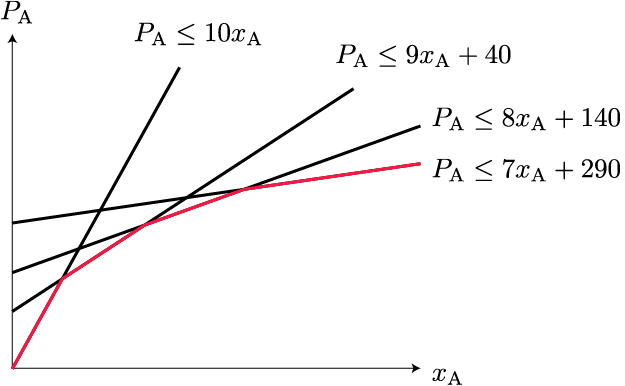

Observation: the previous piece of $P_\mathrm{A}$ always has a higher slope than the latter piece. Also, we want to
maximize the $P_\mathrm{A}$ in the objective function.
Therefore, if the model has 1 batch of $x_\mathrm{A}$ and has the "freedom" to choose between a previous piece and a latter piece, it is guaranteed that the latter piece will not be chosen unless the first piece has already been full, as otherwise that batch will be put into the previous piece for a higher profit.
This allows the following formulation.

This formulation is also based on $P_\mathrm{A}$ being concave and maximized in the objective function.

#### Variables
- $x_\mathrm{A1}, x_\mathrm{A2}, x_\mathrm{A3}, x_\mathrm{A4}$: amount of fuel A in 4 different pieces; 
$x_\mathrm{A1} \in [0, 40], x_\mathrm{A2} \in [0, 60], x_\mathrm{A3} \in [0, 50], x_\mathrm{A4} \geq 0$
- $x_\mathrm{B1}, x_\mathrm{B2}, x_\mathrm{B3}$: amount of fuel B in 3 different pieces; 
$x_\mathrm{B1} \in [0, 50], x_\mathrm{B2} \in [0, 50], x_\mathrm{B3} \geq 0$
- $x_\mathrm{C1}, x_\mathrm{C2}$: amount of fuel A in 2 different pieces; 
$x_\mathrm{C1} \in [0, 100], x_\mathrm{C2} \geq 0$

#### Objective function
$$ \max 10 x_\mathrm{A1} + 9 x_\mathrm{A2} + 8 x_\mathrm{A3} + 7 x_\mathrm{A4} + 6 x_\mathrm{B1} + 4 x_\mathrm{B2} + 3 x_\mathrm{B3} + 5 x_\mathrm{C1} + 4 x_\mathrm{C2} $$

#### Constraints

##### Recourse constraints
Engineering service:
\begin{equation*}
  (x_\mathrm{A1} + x_\mathrm{A2} + x_\mathrm{A3} + x_\mathrm{A4}) + 2 (x_\mathrm{B1} + x_\mathrm{B2} + x_\mathrm{B3}) + (x_\mathrm{C1} + x_\mathrm{C2}) \leq 100
\end{equation*}

Direct labor:
\begin{equation*}
  10 (x_\mathrm{A1} + x_\mathrm{A2} + x_\mathrm{A3} + x_\mathrm{A4}) + 4 (x_\mathrm{B1} + x_\mathrm{B2} + x_\mathrm{B3}) + 5 (x_\mathrm{C1} + x_\mathrm{C2}) \leq 700
\end{equation*}

Material:
\begin{equation*}
  30 (x_\mathrm{A1} + x_\mathrm{A2} + x_\mathrm{A3} + x_\mathrm{A4}) + 20 (x_\mathrm{B1} + x_\mathrm{B2} + x_\mathrm{B3}) + 10 (x_\mathrm{C1} + x_\mathrm{C2}) \leq 4000
\end{equation*}


##### Bounds
\begin{equation*}
  x_\mathrm{A1} \in [0, 40], x_\mathrm{A2} \in [0, 60], x_\mathrm{A3} \in [0, 50], x_\mathrm{A4} \geq 0
\end{equation*}

\begin{equation*}
  x_\mathrm{B1} \in [0, 50], x_\mathrm{B2} \in [0, 50], x_\mathrm{B3} \geq 0
\end{equation*}

\begin{equation*}
  x_\mathrm{C1} \in [0, 100], x_\mathrm{C2} \geq 0
\end{equation*}

### 2.A2.2. Domain reduction

Some may have found that certain pieces of the profit piecewise functions will never happen because of the limitation of recourses. 
Therefore, we do not have to model these pieces into the system.

This is a correct step, and the answer should receive full credit. 
But as long as the constraints are formulated appropriately, the impractical pieces will be eliminated automatically by the solver.

### 2.A2.3. Integer variables

It is acceptable to change the variable of $x$'s from continuous variables to integer variables, as the units for them are batch(es), although technically all variables in an LP should be continuous variables.


## 2.B. Solving in Pyomo

### 2.B.1. model corresponding to 2.A1.

In [9]:
# import pyomo package
from pyomo.environ import *

# create model
m = ConcreteModel()

# create set for fuel types
m.f = Set(initialize=['A', 'B', 'C'])

# create parameters
# engineering service
m.es = Param(m.f, initialize={
    'A': 1,
    'B': 2,
    'C': 3
})
m.es_max = Param(initialize=100)
# direct labor
m.dl = Param(m.f, initialize={
    'A': 10,
    'B': 4,
    'C': 5
})
m.dl_max = Param(initialize=700)
# raw material
m.rm = Param(m.f, initialize={
    'A': 30,
    'B': 20,
    'C': 10
})
m.rm_max = Param(initialize=4000)

# create variables
# amount of fuels
m.x = Var(m.f, within=NonNegativeReals)
# profit
m.p = Var(m.f, within=NonNegativeReals)

# create constraints
# engineering service
m.es_con = Constraint(expr=summation(m.es, m.x) <= m.es_max)
# direct labor
m.dl_con = Constraint(expr=summation(m.dl, m.x) <= m.dl_max)
# raw material
m.rm_con = Constraint(expr=summation(m.rm, m.x) <= m.rm_max)
# profit of Fuel A
m.p_A_1 = Constraint(expr=m.p['A'] <= 10 * m.x['A'])
m.p_A_2 = Constraint(expr=m.p['A'] <= 9 * m.x['A'] + 40)
m.p_A_3 = Constraint(expr=m.p['A'] <= 8 * m.x['A'] + 140)
m.p_A_4 = Constraint(expr=m.p['A'] <= 7 * m.x['A'] + 290)
# profit of B
m.p_B_1 = Constraint(expr=m.p['B'] <= 6 * m.x['B'])
m.p_B_2 = Constraint(expr=m.p['B'] <= 4 * m.x['B'] + 100)
m.p_B_3 = Constraint(expr=m.p['B'] <= 3 * m.x['B'] + 200)
# profit of C
m.p_C_1 = Constraint(expr=m.p['C'] <= 5 * m.x['C'])
m.p_C_2 = Constraint(expr=m.p['C'] <= 4 * m.x['C'] + 100)


# create objective
m.obj = Objective(expr=summation(m.p), sense=maximize)

# set solver
solver=SolverFactory('glpk')
# solve the model
solver.solve(m)
# output results
print("\tAmount\tProfit")
for i in m.f:
    print(f"{i}\t{value(m.x[i])}\t{value(m.p[i])}")
print(f"\nTotal profit: {value(sum(m.p[i] for i in m.f))}")

	Amount	Profit
A	62.5	602.5
B	18.75	112.5
C	0.0	0.0

Total profit: 715.0


### 2.B.2. model corresponding to 2.A2.1.

In [10]:
# import pyomo package
from pyomo.environ import *

# create model
m = ConcreteModel()

# create set for fuel types (extended for each piece)
m.f = Set(initialize=['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C1', 'C2'])

# create parameters
# engineering service
m.es = Param(m.f, initialize={
    'A1': 1,
    'A2': 1,
    'A3': 1,
    'A4': 1,
    'B1': 2,
    'B2': 2,
    'B3': 2,
    'C1': 3,
    'C2': 3
})
m.es_max = Param(initialize=100)
# direct labor
m.dl = Param(m.f, initialize={
    'A1': 10,
    'A2': 10,
    'A3': 10,
    'A4': 10,
    'B1': 4,
    'B2': 4,
    'B3': 4,
    'C1': 5,
    'C2': 5
})
m.dl_max = Param(initialize=700)
# raw material
m.rm = Param(m.f, initialize={
    'A1': 30,
    'A2': 30,
    'A3': 30,
    'A4': 30,
    'B1': 20,
    'B2': 20,
    'B3': 20,
    'C1': 10,
    'C2': 10
})
m.rm_max = Param(initialize=4000)
# unit profit
m.p = Param(m.f, initialize={
    'A1': 10,
    'A2': 9,
    'A3': 8,
    'A4': 7,
    'B1': 6,
    'B2': 4,
    'B3': 3,
    'C1': 5,
    'C2': 4
})
# lower and upper bounds of each piece
x_bounds = {
    'A1': (0, 40),
    'A2': (0, 60),
    'A3': (0, 50),
    'A4': (0, None),
    'B1': (0, 50),
    'B2': (0, 50),
    'B3': (0, None),
    'C1': (0, 100),
    'C2': (0, None)
}
# define a python function to return different bounds for different m.x[f]
def x_bound_rule(m, f):
    return x_bounds[f]

# create variables
# amount of fuels
m.x = Var(m.f, within=NonNegativeReals, bounds=x_bound_rule)

# create constraints
# engineering service
m.es_con = Constraint(expr=summation(m.es, m.x) <= m.es_max)
# direct labor
m.dl_con = Constraint(expr=summation(m.dl, m.x) <= m.dl_max)
# raw material
m.rm_con = Constraint(expr=summation(m.rm, m.x) <= m.rm_max)

# create objective
m.obj = Objective(expr=summation(m.p, m.x), sense=maximize)

# set solver
solver = SolverFactory('glpk')
# solve the model
solver.solve(m)
# output results
print("\tAmount\tProfit")
for i in m.f:
    print(f"{i}\t{value(m.x[i])}\t{value(m.p[i])*value(m.x[i])}")
print(f"\nTotal profit: {value(sum(m.p[i]*value(m.x[i]) for i in m.f))}")

	Amount	Profit
A1	40.0	400.0
A2	22.5	202.5
A3	0.0	0.0
A4	0.0	0.0
B1	18.75	112.5
B2	0.0	0.0
B3	0.0	0.0
C1	0.0	0.0
C2	0.0	0.0

Total profit: 715.0


### 2.B.3. model corresponding to 2.A2.3.

In [11]:
from pyomo.environ import *

m = ConcreteModel()

m.f = Set(initialize=['A', 'B', 'C'])
m.es = Param(m.f, initialize={
    'A': 1,
    'B': 2,
    'C': 3
})
m.es_max = Param(initialize=100)
m.dl = Param(m.f, initialize={
    'A': 10,
    'B': 4,
    'C': 5
})
m.dl_max = Param(initialize=700)
m.rm = Param(m.f, initialize={
    'A': 30,
    'B': 20,
    'C': 10
})
m.rm_max = Param(initialize=4000)

m.x = Var(m.f, within=NonNegativeIntegers)
m.p = Var(m.f, within=NonNegativeIntegers)

m.es_con = Constraint(expr=summation(m.es, m.x) <= m.es_max)
m.dl_con = Constraint(expr=summation(m.dl, m.x) <= m.dl_max)
m.rm_con = Constraint(expr=summation(m.rm, m.x) <= m.rm_max)
m.p_A_1 = Constraint(expr=m.p['A'] <= 10 * m.x['A'])
m.p_A_2 = Constraint(expr=m.p['A'] <= 9 * m.x['A'] + 40)
m.p_A_3 = Constraint(expr=m.p['A'] <= 8 * m.x['A'] + 140)
m.p_A_4 = Constraint(expr=m.p['A'] <= 7 * m.x['A'] + 290)
m.p_B_1 = Constraint(expr=m.p['B'] <= 6 * m.x['B'])
m.p_B_2 = Constraint(expr=m.p['B'] <= 4 * m.x['B'] + 100)
m.p_B_3 = Constraint(expr=m.p['B'] <= 3 * m.x['B'] + 200)
m.p_C_1 = Constraint(expr=m.p['C'] <= 5 * m.x['C'])
m.p_C_2 = Constraint(expr=m.p['C'] <= 4 * m.x['C'] + 100)

m.obj = Objective(expr=summation(m.p), sense=maximize)

solver=SolverFactory('glpk')
solver.solve(m)
print("\tAmount\tProfit")
for i in m.f:
    print(f"{i}\t{value(m.x[i])}\t{value(m.p[i])}")
print(f"\nTotal profit: {value(sum(m.p[i] for i in m.f))}")

	Amount	Profit
A	62.0	598.0
B	19.0	114.0
C	0.0	0.0

Total profit: 712.0


In general, binary variables can be utilized to represent the "if-then" logic directly. 
The MILP and MINLP formulations presented below can be used for general piecewise linear functions, and **do not 
require the function to be concave when it is maximzied**.

For piecewise function, we can use one binary variable for each piece, and use them to represent the relationship between each piece.

## 3.A.1. MILP formulation - Big-M

Binary variables and a technique called "big-M formulation" can help represent piecewise linear function in any
shape as MILP.

**NOTE**: The big-M formulation is pretty complicated, and some solutions may only cover part of the logic of the complete solution.
As long as they are MILP and the answer is correct, they can receive full credit.

### Variables
- $P_\mathrm{A}, P_\mathrm{B}, P_\mathrm{C}$: profits of fuel A, B, and C
- $x_\mathrm{A}, x_\mathrm{B}, x_\mathrm{C}$: amount of fuel A, B, and C
- $y_\mathrm{A1}, y_\mathrm{A2}, y_\mathrm{A3}, y_\mathrm{A4}, y_\mathrm{B1}, y_\mathrm{B2}, y_\mathrm{B3}, y_\mathrm{C1}, y_\mathrm{C2}$: binary variables indicating which interval $x_\mathrm{A}/x_\mathrm{B}/x_\mathrm{C}$ is in, $y_{i} \in \{0, 1\}, i \in \{\mathrm{A1, \dots, A4, B1, \dots, B3, C1, C2}\}$

### Objective function
$$ \max P_\mathrm{A} + P_\mathrm{B} + P_\mathrm{C} $$

### Constraints
#### Big-M constraints
##### Fuel A
\begin{equation*}
  P_\mathrm{A} (x_\mathrm{A}) =
    \begin{cases}
        10 x_\mathrm{A}, & x_\mathrm{A} \leq 40 \\
        9 x_\mathrm{A} + 40, & 40 \leq x_\mathrm{A} \leq 100 \\
        8 x_\mathrm{A} + 140, & 100 \leq x_\mathrm{A} \leq 150 \\
        7 x_\mathrm{A} + 290, & x_\mathrm{A} \geq 150
    \end{cases}
\end{equation*}

To represent the piecewise relaionship with only one $P_\mathrm{A}$ and $x_\mathrm{A}$, we can use the following 
set of inequalities to represent one piece:

\begin{equation*}
    0 - M \cdot (1 - y_\mathrm{A1}) \leq x_\mathrm{A} \leq 40 + M \cdot (1 - y_\mathrm{A1}), \quad
    10 x_\mathrm{A} - M \cdot (1 - y_\mathrm{A1}) \leq P_\mathrm{A} \leq 10 x_\mathrm{A} + M \cdot (1 + y_\mathrm{A1}),
\end{equation*}
where $M$ is a big enough constant (its role will be explained later).

- when $y_\mathrm{A1} = 1$ (by definition it means $x_\mathrm{A}$ is in the $[0, 40]$ interval), the $M$ is canceled in all equations, and the inequalities become $0 \leq x_\mathrm{A} \leq 40, 10 x_\mathrm{A} \leq P_\mathrm{A} \leq 10 x_\mathrm{A} \Longrightarrow P_\mathrm{A} = 10 x_\mathrm{A}$, which is exactly the first piece of the function.
- when $y_\mathrm{A1} = 0$, the inequalities become $-M \leq x_\mathrm{A} \leq 40 + M, 10 x_\mathrm{A} - M \leq P_\mathrm{A} \leq 10 x_\mathrm{A} + M$. As $M$ is big enough, these inequalities are effectively relaxed.

Since $M$ needs to be big enough to effectively relax all constraints, this formulation is called "big-M".

Similarly, we can apply the following inequalities for the rest three pieces of A:

\begin{equation*}
    40 - M \cdot (1 - y_\mathrm{A2}) \leq x_\mathrm{A} \leq 100 + M \cdot (1 - y_\mathrm{A2}), \quad
    9 x_\mathrm{A} + 40 - M \cdot (1 - y_\mathrm{A2}) \leq P_\mathrm{A} \leq 9 x_\mathrm{A} + 40 + M \cdot (1 + y_\mathrm{A2})
\end{equation*}

\begin{equation*}
    100 - M \cdot (1 - y_\mathrm{A3}) \leq x_\mathrm{A} \leq 150 + M \cdot (1 - y_\mathrm{A3}), \quad
    8 x_\mathrm{A} + 140 - M \cdot (1 - y_\mathrm{A3}) \leq P_\mathrm{A} \leq 8 x_\mathrm{A} + 140 + M \cdot (1 + y_\mathrm{A3})
\end{equation*}

\begin{equation*}
    150 - M \cdot (1 - y_\mathrm{A4}) \leq x_\mathrm{A}, \quad
    7 x_\mathrm{A} + 290 - M \cdot (1 - y_\mathrm{A4}) \leq P_\mathrm{A} \leq 7 x_\mathrm{A} + 290 + M \cdot (1 + y_\mathrm{A4})
\end{equation*}

Since $x_\mathrm{A}$ can only be in one interval at the same time, we can specify that the sum of $y_\mathrm{A1}, y_\mathrm{A2}, y_\mathrm{A3}, y_\mathrm{A4}$ to be one.
Then the constraints of only one piece will work in the solution, and all the other constraints are relaxed and 
have no influence on the model.
Thus the piecewise function is formulated in an MILP manner.

##### Fuel B

\begin{equation*}
    0 - M \cdot (1 - y_\mathrm{B1}) \leq x_\mathrm{B} \leq 50 + M \cdot (1 - y_\mathrm{B1}), \quad
    6 x_\mathrm{B} - M \cdot (1 - y_\mathrm{B1}) \leq P_\mathrm{B} \leq 6 x_\mathrm{B} + M \cdot (1 + y_\mathrm{B1})
\end{equation*}

\begin{equation*}
    50 - M \cdot (1 - y_\mathrm{B2}) \leq x_\mathrm{B} \leq 100 + M \cdot (1 - y_\mathrm{B2}), \quad
    4 x_\mathrm{B} + 100 - M \cdot (1 - y_\mathrm{B2}) \leq P_\mathrm{B} \leq 4 x_\mathrm{B} + 100 + M \cdot (1 + y_\mathrm{B2})
\end{equation*}

\begin{equation*}
    100 - M \cdot (1 - y_\mathrm{B3}) \leq x_\mathrm{B}, \quad
    3 x_\mathrm{B} + 200 - M \cdot (1 - y_\mathrm{B3}) \leq P_\mathrm{B} \leq 3 x_\mathrm{B} + 200 + M \cdot (1 + y_\mathrm{B3})
\end{equation*}

##### Fuel C

\begin{equation*}
    0 - M \cdot (1 - y_\mathrm{C1}) \leq x_\mathrm{C} \leq 100 + M \cdot (1 - y_\mathrm{C1}), \quad
    5 x_\mathrm{C} - M \cdot (1 - y_\mathrm{C1}) \leq P_\mathrm{C} \leq 5 x_\mathrm{C} + M \cdot (1 + y_\mathrm{C1})
\end{equation*}

\begin{equation*}
    100 - M \cdot (1 - y_\mathrm{C1}) \leq x_\mathrm{C}, \quad
    4 x_\mathrm{C} + 100 - M \cdot (1 - y_\mathrm{C2}) \leq P_\mathrm{C} \leq 4 x_\mathrm{C} + 100 + M \cdot (1 + y_\mathrm{C2})
\end{equation*}
 
 
#### relationship among binary variables
$x_\mathrm{A}$ can only be at one of the four intervals corresponding to the four pieces, so
\begin{equation*}
  y_\mathrm{A1} + y_\mathrm{A2} + y_\mathrm{A3} + y_\mathrm{A4} = 1.
\end{equation*}
Similarly,
\begin{equation*}
  y_\mathrm{B1} + y_\mathrm{B2} + y_\mathrm{B3} = 1,
\end{equation*}
\begin{equation*}
  y_\mathrm{C1} + y_\mathrm{C2} = 1.
\end{equation*}


#### Recourse constraints
Engineering service:
\begin{equation*}
  x_\mathrm{A} + 2 x_\mathrm{B} + x_\mathrm{C} \leq 100
\end{equation*}

Direct labor:
\begin{equation*}
  10 x_\mathrm{A} + 4 x_\mathrm{B} + 5 x_\mathrm{C} \leq 700
\end{equation*}

Material:
\begin{equation*}
  30 x_\mathrm{A} + 20 x_\mathrm{B} + 10 x_\mathrm{C} \leq 4000
\end{equation*}


#### Bounds
\begin{equation*}
  x_\mathrm{A}, x_\mathrm{B}, x_\mathrm{C}, P_\mathrm{A}, P_\mathrm{B}, P_\mathrm{C} \geq 0
\end{equation*}


## 3.A2. MINLP formulation

The idea of this formulation is similar to the MILP formulation with one binary indicating which interval the amount variable is in.
The difference is that instead of the big-M constraints, it replaces the $x_{A}$ term with the **nonlinear** terms
$y_\mathrm{Ai} \cdot x_\mathrm{A}, i = 1, 2, 3, 4$, along with some other changes.
As there can only be one $y_\mathrm{Ai}$ to be one, the $x_\mathrm{A}$'s in other intervals are effectively canceled.
Similar formulations are applied to $x_\mathrm{B}$ and $x_\mathrm{C}$.

This formulation is simpler than the MILP formulation in terms of the constraint numbers, but it introduces nonlinearity, and, more importantly, nonconvexity into the model, which makes it significantly harder to solve.
Although we accept both formulations for this problem, typically MILP is favored especially when the model size is large.

### Variables
- $P_\mathrm{A}, P_\mathrm{B}, P_\mathrm{C}$: profits of fuel A, B, and C
- $x_\mathrm{A}, x_\mathrm{B}, x_\mathrm{C}$: amount of fuel A, B, and C
- $y_\mathrm{A1}, y_\mathrm{A2}, y_\mathrm{A3}, y_\mathrm{A4}, y_\mathrm{B1}, y_\mathrm{B2}, y_\mathrm{B3}, y_\mathrm{C1}, y_\mathrm{C2}$: binary variables indicating which interval $x_\mathrm{A}/x_\mathrm{B}/x_\mathrm{C}$ is in, $y_{i} \in \{0, 1\}, i \in \{\mathrm{A1, \dots, A4, B1, \dots, B3, C1, C2}\}$

### Objective function
$$ \max y_\mathrm{A1}(10x_\mathrm{A}) + y_\mathrm{A2}(9x_\mathrm{A} + 40) + y_\mathrm{A3}(8x_\mathrm{A} + 140) + y_\mathrm{A4}(7x_\mathrm{A} + 290) + y_\mathrm{B1}(6x_\mathrm{B}) + y_\mathrm{B2}(4x_\mathrm{B} + 100) + y_\mathrm{B3}(3x_\mathrm{B} + 200) + y_\mathrm{C1}(5x_\mathrm{C}) + y_\mathrm{C2}(4x_\mathrm{C} + 100) $$

### Constraints
#### relationship among binary variables
\begin{equation*}
  y_\mathrm{A1} + y_\mathrm{A2} + y_\mathrm{A3} + y_\mathrm{A4} = 1
\end{equation*}
\begin{equation*}
  y_\mathrm{B1} + y_\mathrm{B2} + y_\mathrm{B3} = 1
\end{equation*}
\begin{equation*}
  y_\mathrm{C1} + y_\mathrm{C2} = 1
\end{equation*}

#### Constraints on piece intervals
#### Fuel A
\begin{equation*}
  0 \leq y_\mathrm{A1} \cdot x_\mathrm{A} \leq 40
\end{equation*}
\begin{equation*}
  y_\mathrm{A2} \cdot 40 \leq y_\mathrm{A2} \cdot x_\mathrm{A} \leq 100
\end{equation*}
\begin{equation*}
  y_\mathrm{A3} \cdot 100 \leq y_\mathrm{A3} \cdot x_\mathrm{A} \leq 150
\end{equation*}
\begin{equation*}
  y_\mathrm{A4} \cdot 150 \leq y_\mathrm{A4} \cdot x_\mathrm{A}
\end{equation*}

#### Fuel B
\begin{equation*}
  0 \leq y_\mathrm{B1} \cdot x_\mathrm{B} \leq 50
\end{equation*}
\begin{equation*}
  y_\mathrm{B2} \cdot 50 \leq y_\mathrm{B2} \cdot x_\mathrm{B} \leq 100
\end{equation*}
\begin{equation*}
  y_\mathrm{B3} \cdot 100 \leq y_\mathrm{B3} \cdot x_\mathrm{B}
\end{equation*}

#### Fuel C
\begin{equation*}
  0 \leq y_\mathrm{C1} \cdot x_\mathrm{C} \leq 100
\end{equation*}
\begin{equation*}
  y_\mathrm{C2} \cdot 100 \leq y_\mathrm{C2} \cdot x_\mathrm{C}
\end{equation*}
   
#### Recourse constraints
Engineering service:
\begin{equation*}
  x_\mathrm{A} + 2 x_\mathrm{B} + x_\mathrm{C} \leq 100
\end{equation*}

Direct labor:
\begin{equation*}
  10 x_\mathrm{A} + 4 x_\mathrm{B} + 5 x_\mathrm{C} \leq 700
\end{equation*}

Material:
\begin{equation*}
  30 x_\mathrm{A} + 20 x_\mathrm{B} + 10 x_\mathrm{C} \leq 4000
\end{equation*}


#### Bounds
\begin{equation*}
  x_\mathrm{A}, x_\mathrm{B}, x_\mathrm{C}, P_\mathrm{A}, P_\mathrm{B}, P_\mathrm{C} \geq 0
\end{equation*}
   
## 3.A3. MILP from P2 requiring variables to be integer

Although we intend to explore the usage of binary variables in P3, it is acceptable to directly force variables in P2 model to be integers and get an MILP model.

## 3.B1. MILP model

In [6]:
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverStatus, TerminationCondition
import matplotlib.pyplot as plt

#Write your code for question 3 here:

m = ConcreteModel()

# define sets
m.f = Set(initialize=['A', 'B', 'C'])
m.fa = Set(initialize=['A1', 'A2', 'A3', 'A4'])
m.fb = Set(initialize=['B1', 'B2', 'B3'])
m.fc = Set(initialize=['C1', 'C2'])
m.fp = m.fa | m.fb | m.fc

# define parameters
# engineering service
m.es = Param(m.f, initialize={
    'A': 1,
    'B': 2,
    'C': 3
})
m.es_max = Param(initialize=100)
# direct labor
m.dl = Param(m.f, initialize={
    'A': 10,
    'B': 4,
    'C': 5
})
m.dl_max = Param(initialize=700)
# raw material
m.rm = Param(m.f, initialize={
    'A': 30,
    'B': 20,
    'C': 10
})
m.rm_max = Param(initialize=4000)
# lower and upper bounds of each piece
x_bounds = {
    'A1': (0, 40),
    'A2': (40, 100),
    'A3': (100, 150),
    'A4': (150, None),
    'B1': (0, 50),
    'B2': (50, 100),
    'B3': (100, None),
    'C1': (0, 100),
    'C2': (100, None)
}
# big M
m.M = Param(initialize=1000)

# define variables
m.x = Var(m.f, within=NonNegativeReals)
m.p = Var(m.f, within=NonNegativeReals)
m.y = Var(m.fp, within=Binary)

# define constraints 
# ------------------------------------------------------------------------------
# relationship among binary variables
m.b_con1 = Constraint(expr=sum(m.y[i] for i in m.fa) == 1)
m.b_con2 = Constraint(expr=sum(m.y[i] for i in m.fb) == 1)
m.b_con3 = Constraint(expr=sum(m.y[i] for i in m.fc) == 1)
# ------------------------------------------------------------------------------
# big-M constraints on x intervals
def bigM_ruleA1(m, fa):
    return m.x['A'] >= x_bounds[fa][0] - m.M * (1 - m.y[fa])

def bigM_ruleA2(m, fa):
    if x_bounds[fa][1] == None:
        return Constraint.Skip
    return m.x['A'] <= x_bounds[fa][1] + m.M * (1 - m.y[fa])

def bigM_ruleB1(m, fb):
    return m.x['B'] >= x_bounds[fb][0] - m.M * (1 - m.y[fb])

def bigM_ruleB2(m, fb):
    if x_bounds[fb][1] == None:
        return Constraint.Skip
    return m.x['B'] <= x_bounds[fb][1] + m.M * (1 - m.y[fb])

def bigM_ruleC1(m, fc):
    return m.x['C'] >= x_bounds[fc][0] - m.M * (1 - m.y[fc])

def bigM_ruleC2(m, fc):
    if x_bounds[fc][1] == None:
        return Constraint.Skip
    return m.x['C'] <= x_bounds[fc][1] + m.M * (1 - m.y[fc])

m.bigM_conA1 = Constraint(m.fa, rule=bigM_ruleA1)
m.bigM_conA2 = Constraint(m.fa, rule=bigM_ruleA2)
m.bigM_conB1 = Constraint(m.fb, rule=bigM_ruleB1)
m.bigM_conB2 = Constraint(m.fb, rule=bigM_ruleB2)
m.bigM_conC1 = Constraint(m.fc, rule=bigM_ruleC1)
m.bigM_conC2 = Constraint(m.fc, rule=bigM_ruleC2)
# ------------------------------------------------------------------------------
# engineering service
m.es_con = Constraint(expr=summation(m.es, m.x) <= m.es_max)
# direct labor
m.dl_con = Constraint(expr=summation(m.dl, m.x) <= m.dl_max)
# raw material
m.rm_con = Constraint(expr=summation(m.rm, m.x) <= m.rm_max)
# ------------------------------------------------------------------------------
# big-M: profit of A
m.p_A_11 = Constraint(expr=m.p['A'] <= 10 * m.x['A'] + m.M * (1 - m.y['A1']))
m.p_A_21 = Constraint(expr=m.p['A'] <= 9 * m.x['A'] + 40 + m.M * (1 - m.y['A2']))
m.p_A_31 = Constraint(expr=m.p['A'] <= 8 * m.x['A'] + 140 + m.M * (1 - m.y['A3']))
m.p_A_41 = Constraint(expr=m.p['A'] <= 7 * m.x['A'] + 290 + m.M * (1 - m.y['A4']))
m.p_A_12 = Constraint(expr=m.p['A'] >= 10 * m.x['A'] - m.M * (1 - m.y['A1']))
m.p_A_22 = Constraint(expr=m.p['A'] >= 9 * m.x['A'] + 40 - m.M * (1 - m.y['A2']))
m.p_A_32 = Constraint(expr=m.p['A'] >= 8 * m.x['A'] + 140 - m.M * (1 - m.y['A3']))
m.p_A_42 = Constraint(expr=m.p['A'] >= 7 * m.x['A'] + 290 - m.M * (1 - m.y['A4']))
# big-M: profit of B
m.p_B_11 = Constraint(expr=m.p['B'] <= 6 * m.x['B'] + m.M * (1 - m.y['B1']))
m.p_B_21 = Constraint(expr=m.p['B'] <= 4 * m.x['B'] + 100 + m.M * (1 - m.y['B2']))
m.p_B_31 = Constraint(expr=m.p['B'] <= 3 * m.x['B'] + 200 + m.M * (1 - m.y['B3']))
m.p_B_12 = Constraint(expr=m.p['B'] >= 6 * m.x['B'] - m.M * (1 - m.y['B1']))
m.p_B_22 = Constraint(expr=m.p['B'] >= 4 * m.x['B'] + 100 - m.M * (1 - m.y['B2']))
m.p_B_33 = Constraint(expr=m.p['B'] >= 3 * m.x['B'] + 200 - m.M * (1 - m.y['B3']))
# big-M: profit of C
m.p_C_11 = Constraint(expr=m.p['C'] <= 5 * m.x['C'] + m.M * (1 - m.y['C1']))
m.p_C_21 = Constraint(expr=m.p['C'] <= 4 * m.x['C'] + 100 + m.M * (1 - m.y['C2']))
m.p_C_12 = Constraint(expr=m.p['C'] >= 5 * m.x['C'] - m.M * (1 - m.y['C1']))
m.p_C_22 = Constraint(expr=m.p['C'] >= 4 * m.x['C'] + 100 - m.M * (1 - m.y['C2']))
# ------------------------------------------------------------------------------
# objective
m.obj = Objective(expr=summation(m.p), sense=maximize)
# ------------------------------------------------------------------------------


# set solver
solver = SolverFactory('glpk')
# solve the model
solver.solve(m)

# output results
print("\tAmount\tProfit")
for i in m.f:
    print(f"{i}\t{value(m.x[i])}\t{value(m.p[i])}")
print(f"\nTotal profit: {value(sum(m.p[i] for i in m.f))}")

	Amount	Profit
A	62.5	602.5
B	18.75	112.5
C	0.0	0.0

Total profit: 715.0
